# Sentiment Analysis on Youtube Comments

There was a sentiment analysis project I did back then but this time I want to try using youtube comments from one of Smosh's videos, specifically from their series Reading Reddit Stories. They read posts from Reddit ranging from funny to frustrating levels and have some guests react to them. I thought it would be interesting if I could determine the emotional tone of the comments and how they feel about some of the stories being read.

I have used this <a href="https://colab.research.google.com/drive/1LJDmDeOQP0Zm5VtscIDrsUIppoCtIsMa?usp=sharing">code</a> to pull out comments and replies from the video.

### Install dependencies

In [3]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


### Importing modules

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
import nltk
from textblob import TextBlob, Word
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Setting up the dataset

In [7]:
df = pd.read_csv(r"C:\Users\User\Portfolio Projects\Youtube Comments Sentiment Analysis\comments_data.csv", usecols = [3])
pd.options.display.max_colwidth = 300
df.head(10)

,Comment
0,The clown story: these days it is very easy for a someone good with a grafics program to remove the clown from the pictures.
1,"I love these little throwback jokes to previous stories. That are the moments where I'm actually laughing out loud watching these videos. Thanks guys, you brighten my day on a regular basis."
2,Second story that guy was insane. Who cares what you wear when you are going to sleep? You could be in a full clown costume I’d be like “whatever is comfortable” and roll over the other way and fall asleep snoring.
3,If the parents won't accept OP for his current job then his partner needs to make a decision. Lying about it will only cause more problems
4,Shayne is truly becoming Reddit Story Dad with the beard.
5,that friendship test was wild?!? obviously if the bride tells you to wear the dress and isn’t wearing white of course you would wear it. i’ve seen people wear white to wedding it’s to that uncommon
6,"i think the guy offering to sleep with the OP of that dress story might have been thinking ""yeah yeah look. you're pissed at her, i get it. I'm not too happy either. let's go do a revenge thing so we can all get over it."" which is................... Not Great!"
7,"Story 2 bro is a scarily controlling asshole and he's showing her exactly who he is right now - don't walk, RUN!!! She's just an object to him 😢"
8,Clown story ...Pretty sure the story said the clown was only in a few pictures
9,"Oh that friendship text story, that couple are both TOXIC AF! I first thought that maybe the bride has an anxious attachment style, 'testing friends' can be something that people with BPD do..they both need separate therapy, I don't think their relationship will last happily"


### Preprocessing

Used pre-processing techniques:

- Converting all characters to lower-case
- Removing all tweet mentions
- Removing URLS
- Removing Usernames/Mentions
- Removing Punctuations
- Stop Words Removal
- Removing Numerical Data
- Removing Duplicate Characters in word

In [9]:
# Creating a function to clean the tweets, convert text to lower-case, remove unnecessary characters, 
# spaces, and stopwords.
def clean_comment(comment):
    if type(comment) == float:
        return ""
    comment = comment.lower()                             # convert text to lower-case
    comment = re.sub("'", '', comment)                    # This is to avoid removing contractions in English
    comment = re.sub('@[A-Za-z0-9_]+', '', comment)       # remove mentions
    comment = re.sub(r'http\S+', '', comment)             # remove URLs
    comment = re.sub(r'[^\w\s]', '', comment)             # remove punctuation
    comment = re.sub(r'http\S+', '', comment)             # remove links
    comment = re.sub('(.)\\1{2,}', '\\1', comment)        # remove duplicate characters in a word
    comment = comment.split()                             # tokenization
    
    stopwords = ['for', 'on', 'an', 'a', 'of', 'and', 'in', 'the', 'to', 'from']
    comment = [w for w in comment if not w in stopwords]  # remove stopwords
    comment = " ".join(word for word in comment)
    return comment


# Cleaning the comments
df['Comment'] = df['Comment'].apply(clean_comment)

# Show clean comments
df.head(10)

,Comment
0,clown story these days it is very easy someone good with grafics program remove clown pictures
1,i love these little throwback jokes previous stories that are moments where im actually laughing out loud watching these videos thanks guys you brighten my day regular basis
2,second story that guy was insane who cares what you wear when you are going sleep you could be full clown costume id be like whatever is comfortable roll over other way fall asleep snoring
3,if parents wont accept op his current job then his partner needs make decision lying about it will only cause more problems
4,shayne is truly becoming reddit story dad with beard
5,that friendship test was wild obviously if bride tells you wear dress isnt wearing white course you would wear it ive seen people wear white wedding its that uncommon
6,i think guy offering sleep with op that dress story might have been thinking yeah yeah look youre pissed at her i get it im not too happy either lets go do revenge thing so we can all get over it which is not great
7,story 2 bro is scarily controlling asshole hes showing her exactly who he is right now dont walk run shes just object him
8,clown story pretty sure story said clown was only few pictures
9,oh that friendship text story that couple are both toxic af i first thought that maybe bride has anxious attachment style testing friends can be something that people with bpd dothey both need separate therapy i dont think their relationship will last happily


### Getting the Subjectivity and Polarity

In [11]:
# Creating a function to get the subjectivity
def getSubjectivity(dataset):
    return TextBlob(dataset).sentiment.subjectivity


# Creating a function to get the polarity
def getPolarity(dataset):
    return TextBlob(dataset).sentiment.polarity


# Creating two new columns
df['Subjectivity'] = df['Comment'].apply(getSubjectivity)
df['Polarity'] = df['Comment'].apply(getPolarity)

# Showing the new dataframe with the new columns
df

,Comment,Subjectivity,Polarity
0,clown story these days it is very easy someone good with grafics program remove clown pictures,0.800000,0.631667
1,i love these little throwback jokes previous stories that are moments where im actually laughing out loud watching these videos thanks guys you brighten my day regular basis,0.349084,0.063690
2,second story that guy was insane who cares what you wear when you are going sleep you could be full clown costume id be like whatever is comfortable roll over other way fall asleep snoring,0.545000,-0.075000
3,if parents wont accept op his current job then his partner needs make decision lying about it will only cause more problems,0.633333,0.166667
4,shayne is truly becoming reddit story dad with beard,0.850000,0.450000
...,...,...,...
2186,i already cooked some waffles,0.000000,0.000000
2187,angela is best,0.300000,1.000000
2188,time eat some platonic waffles,0.000000,0.000000
2189,this could be insane euphemism,1.000000,-1.000000


### Sentiment Analysis and Classification of the comments

In [13]:
# Creating a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
#show dataframe
df

,Comment,Subjectivity,Polarity,Analysis
0,clown story these days it is very easy someone good with grafics program remove clown pictures,0.800000,0.631667,Positive
1,i love these little throwback jokes previous stories that are moments where im actually laughing out loud watching these videos thanks guys you brighten my day regular basis,0.349084,0.063690,Positive
2,second story that guy was insane who cares what you wear when you are going sleep you could be full clown costume id be like whatever is comfortable roll over other way fall asleep snoring,0.545000,-0.075000,Negative
3,if parents wont accept op his current job then his partner needs make decision lying about it will only cause more problems,0.633333,0.166667,Positive
4,shayne is truly becoming reddit story dad with beard,0.850000,0.450000,Positive
...,...,...,...,...
2186,i already cooked some waffles,0.000000,0.000000,Neutral
2187,angela is best,0.300000,1.000000,Positive
2188,time eat some platonic waffles,0.000000,0.000000,Neutral
2189,this could be insane euphemism,1.000000,-1.000000,Negative


### Getting the Sentiment Classification Percentage

In [15]:
# Displaying the percentage of tweets who feel a certain way.
positive_comments = df[df.Analysis == 'Positive']
positive_comments = positive_comments['Comment']

negative_comments = df[df.Analysis == 'Negative']
negative_comments = negative_comments['Comment']

neutral_comments = df[df.Analysis == 'Neutral']
neutral_comments = neutral_comments['Comment']

print('%f percent of the tweets are positive.'%(round ((positive_comments.shape[0] / df.shape[0]) *100 , 2)))
print('%f percent of the tweets are negative.'%(round ((negative_comments.shape[0] / df.shape[0]) *100 , 1)))
print('%f percent of the tweets are neutral.'%(round ((neutral_comments.shape[0] / df.shape[0]) *100 , 1)))

48.790000 percent of the tweets are positive.
18.600000 percent of the tweets are negative.
32.600000 percent of the tweets are neutral.


### Wordcloud

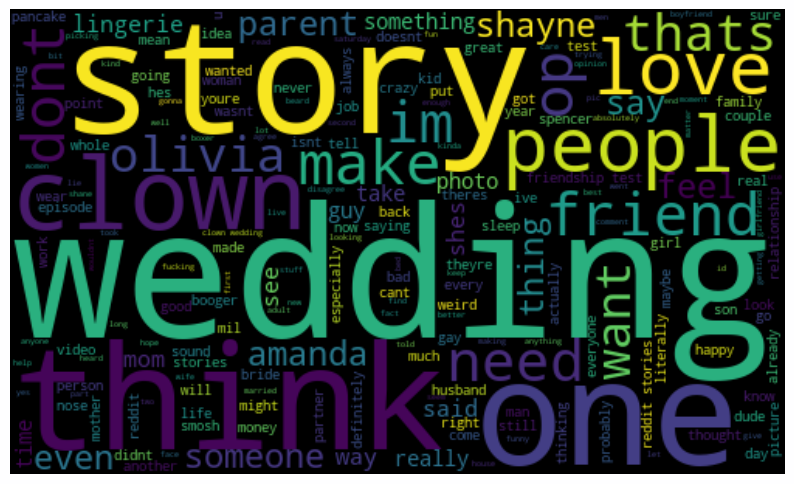

In [17]:
# Plotting word cloud
allWords = ''.join([text for text in df['Comment']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.figure(figsize = (10, 7))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### Plotting the Sentiment Analysis Classification

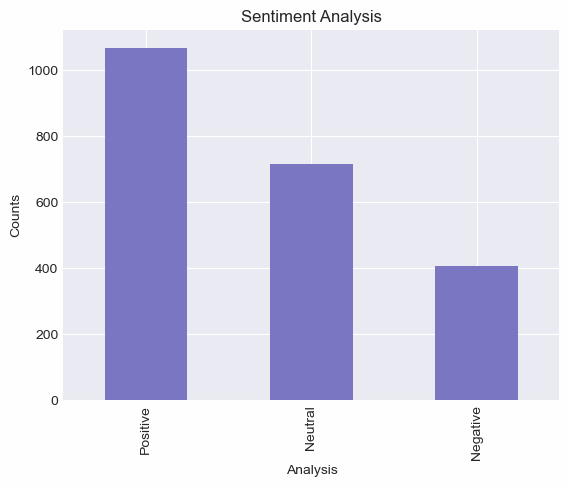

In [19]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [29]:
df.to_csv(r'C:\Users\User\Portfolio Projects\Youtube Comments Sentiment Analysis\cleaned_comments_data.csv', index = False)